In [4]:
import numpy as np

In [37]:
# Task 2.1

X_experience = np . array ([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8]) . reshape ( -1 , 1)
Y_salary = np . array ([45 , 50 , 60 , 65 , 75 , 80 , 90 , 95])

m = 7
c = 40

predicted_salary_Y = m  * X_experience + c
print ("The manual salary (Y) predictions are:", predicted_salary_Y.flatten())

mse = np.mean((Y_salary - predicted_salary_Y.flatten()) ** 2)
print("Mean Squared Error for guess:", mse)



The manual salary (Y) predictions are: [47 54 61 68 75 82 89 96]
Mean Squared Error for guess: 4.5


In [38]:
# Task 2.2

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_experience, Y_salary)
m = model.coef_[0]
c=model.intercept_
print ("Slope (m):", m)
print ("Intercept (c):",c)

Y_predicted_model = model.predict(X_experience)
print ("Predicted Salaries:", Y_predicted_model)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error (Y_salary, Y_predicted_model)
r2 = r2_score(Y_salary,Y_predicted_model)
print ("The mean squared error is:",mse)
print("The R^2 score is:", r2)



Slope (m): 7.380952380952383
Intercept (c): 36.78571428571428
Predicted Salaries: [44.16666667 51.54761905 58.92857143 66.30952381 73.69047619 81.07142857
 88.45238095 95.83333333]
The mean squared error is: 1.4880952380952395
The R^2 score is: 0.994824016563147


Interpretation of Tasks 2.1 and 2.2

1. The relationship between m and c shows us that for every 1 year of experience , the salary increases by approximately 7.38(m) thousand. The inital salary without any experience is approximately 36.79 thousand (c)

2. The Mean Squared error helps us understand how inaccurate or accurate our prediction may be. It basically tells us the prediction's proximity to reality or, more accurately, the average squared difference between the predicted and initial salaries. Therfore, this means that a smaller MSE shows that our predictions are better. My prediction had a mean squared error of about 1.488.

3. The R^2 score basically shows us  how well the regression line I made fits the actual data. If R^2 was equal to 1 then the line was perfect. 

In [39]:
# Task 3.1
from sklearn.linear_model import LogisticRegression
X_prep_hours = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]).reshape(-1, 1)
Y_pass_fail = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

m= 2
c= -5
z= m * X_prep_hours+c

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

pred_prob = sigmoid(z)
print("Predicted Probabilities:", pred_prob.flatten())

pred_classes = (pred_prob >= 0.5).astype(int).flatten()
print("Predicted Classes are:", pred_classes)

correct = np.sum(pred_classes == Y_pass_fail)
accuracy = correct / len(Y_pass_fail)
print("Manual Accuracy is:", accuracy)


Predicted Probabilities: [0.01798621 0.04742587 0.11920292 0.26894142 0.5        0.73105858
 0.88079708 0.95257413 0.98201379 0.99330715]
Predicted Classes are: [0 0 0 0 1 1 1 1 1 1]
Manual Accuracy is: 0.9


In [33]:
# Task 3.2
from sklearn.metrics import accuracy_score, confusion_matrix

model=LogisticRegression(solver='liblinear')  
model.fit(X_prep_hours, Y_pass_fail)

Y_pred_model =model.predict(X_prep_hours)
print("Predicted Classes on Training Data:", Y_pred_model)

accuracy_model= accuracy_score(Y_pass_fail, Y_pred_model)
conf_matrix= confusion_matrix(Y_pass_fail, Y_pred_model)

print("Training Data Accuracy is:", accuracy_model)
print("Confusion Matrix is:\n", conf_matrix)


Predicted Classes on Training Data: [0 0 0 1 1 1 1 1 1 1]
Training Data Accuracy is: 0.8
Confusion Matrix is:
 [[3 2]
 [0 5]]


Interpreting Tasks 3.1 and 3.2

1. The accuracy score reflects how many predictions were correct out of all the attempts made. If the accuracy is higher, then the predictions are better. 

2. True Positives = Pass Predictions are correct
True Negatives = Fail Predictions are correct.
False Positives = Model predicts pass, in reality student fails
False Negatives = Model predicts fail, in reality student passes.



In [ ]:
# Task 4.1 
import numpy as np
import math  

X_cluster_data = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]
])

centroid1 = [2, 10]
centroid2 = [2, 5]

assignments = []

for i, point in enumerate(X_cluster_data):
    dist_to_centroid1 = np.linalg.norm(point - centroid1)
    dist_to_centroid2 = np.linalg.norm(point - centroid2)

    if dist_to_centroid1 <= dist_to_centroid2: 
        assignments.append(1)
    else:
        assignments.append(2)

    print("Point", i, "-> Cluster", assignments[-1]) 

cluster1_points = []
cluster2_points = []

for i in range(len(assignments)):
    if assignments[i] == 1:
        cluster1_points.append(X_cluster_data[i])
    else:
        cluster2_points.append(X_cluster_data[i])

new_centroid1 = np.mean(cluster1_points, axis=0)
new_centroid2 = np.mean(cluster2_points, axis=0)

print()
print("New Centroid 1 :", new_centroid1)
print("New Centroid 2:", new_centroid2)


Point 0 -> Cluster 1
Point 1 -> Cluster 2
Point 2 -> Cluster 2
Point 3 -> Cluster 1
Point 4 -> Cluster 2
Point 5 -> Cluster 2
Point 6 -> Cluster 2
Point 7 -> Cluster 1

Centroid 1 (updated): [3.66666667 9.        ]
Centroid 2 (updated): [4.8 4. ]


In [42]:
# Task 4.2

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_cluster_data = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]
])

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto') 
kmeans.fit(X_cluster_data)

print("Final centroids:", kmeans.cluster_centers_)
print("Cluster Labels:", kmeans.labels_)



Matplotlib is building the font cache; this may take a moment.


Final centroids: [[5.5  3.75]
 [3.25 8.  ]]
Cluster Labels: [1 1 0 1 0 0 0 1]


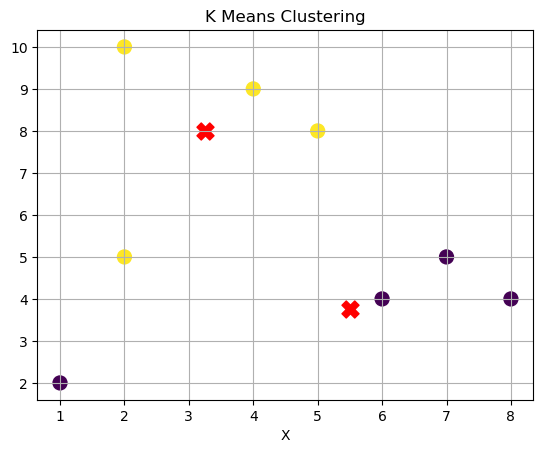

In [43]:
# Optional Plotting (i tried)

plt.scatter(X_cluster_data[:, 0], X_cluster_data[:, 1], c=kmeans.labels_, cmap='viridis', s=100)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=150) 

plt.title('K Means Clustering')
plt.xlabel('X')

plt.grid(True)
plt.show()


Interpretations regarding Tasks 4.1, 4.2

1. The centrids are normally close but sklearn runs multiple initialisations so it might find better centroids as it runs more times. They might be different because during manual calculation, we pick only 1 centroid and keep them the same throughout. But scikit-learn tests different starting spots and keeps updating centroids until it finds the best fit for the data.